#       Notebook 1 - Data

Activity: Data Preparation and Analysis for Neural Networks

This activity is designed to test your skills in generating synthetic datasets, handling real-world data challenges, and preparing data to be fed into neural networks.

## Exercise 1
Exploring Class Separability in 2D

Understanding how data is distributed is the first step before designing a network architecture. In this exercise, you will generate and visualize a two-dimensional dataset to explore how data distribution affects the complexity of the decision boundaries a neural network would need to learn.

### 1.1 Generate the Data: 
Create a synthetic dataset with a total of 400 samples, divided equally among 4 classes (100 samples each). Use a Gaussian distribution to generate the points for each class based on the following parameters:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fixar semente para reprodutibilidade
np.random.seed(42)

# Número de pontos por classe
n = 100

# Definições das classes
params = {
    0: {"mean": [2, 3], "std": [0.8, 2.5]},
    1: {"mean": [5, 6], "std": [1.2, 1.9]},
    2: {"mean": [8, 1], "std": [0.9, 0.9]},
    3: {"mean": [15, 4], "std": [0.5, 2.0]}
}

In [2]:
# Gerar dados
data = []
labels = []
for label, p in params.items():
    x = np.random.normal(p["mean"][0], p["std"][0], n) # np.random.normal gera números aleatórios com distribuição normal
    y = np.random.normal(p["mean"][1], p["std"][1], n)
    points = np.column_stack((x, y)) # Combina x e y em uma matriz n x 2, np.column_stack junta arrays como colunas
    data.append(points)
    labels.append(np.full(n, label)) # np.full cria um array preenchido com o valor do label

# Concatenar tudo
X = np.vstack(data) # np.vstack empilha arrays verticalmente
y = np.hstack(labels) # np.hstack empilha arrays horizontalmente

### 1.2 Plot the Data: 
Create a 2D scatter plot showing all the data points. Use a different color for each class to make them distinguishable.

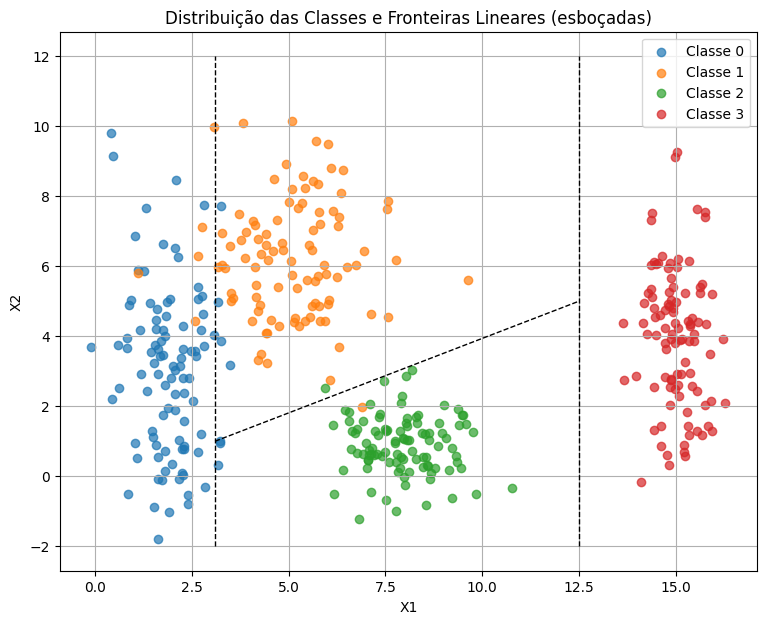

In [3]:
# ---------- Plot ----------
plt.figure(figsize=(9,7))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Scatter de cada classe
for i, c in enumerate(colors):
    plt.scatter(X[y==i, 0], X[y==i, 1], alpha=0.7, label=f'Classe {i}', color=c)

# Criar valores no eixo X para desenhar as retas
x_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)

# ---------- Retas manuais (ajuste “no olho”) ----------
plt.plot([3.1,3.1], [-2,12], 'k--', linewidth=1)   # entre Classe 0 e 1
plt.plot([3.1,12.5], [1,5], 'k--', linewidth=1)  # entre Classe 1 e 2
plt.plot([12.5,12.5], [-2,12], 'k--', linewidth=1)   # entre Classe 2 e 3

# Ajustes do gráfico
plt.title("Distribuição das Classes e Fronteiras Lineares (esboçadas)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

### 1.3 Analyze and Draw Boundaries:
a. Examine the scatter plot carefully. Describe the distribution and overlap of the four classes.

b. Based on your visual inspection, could a simple, linear boundary separate all classes?

c. On your plot, sketch the decision boundaries that you think a trained neural network might learn to separate these classes.


## Exercise 2

Non-Linearity in Higher Dimensions

Simple neural networks (like a Perceptron) can only learn linear boundaries. Deep networks excel when data is not linearly separable. This exercise challenges you to create and visualize such a dataset.

### 2.1 Generate the Data: 
Create a dataset with 500 samples for Class A and 500 samples for Class B. Use a multivariate normal distribution with the following parameters:

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Médias
mu_A = np.array([0, 0, 0, 0, 0])
mu_B = np.array([1.5, 1.5, 1.5, 1.5, 1.5])

# Matrizes de covariância
Sigma_A = np.array([
    [1.0, 0.8, 0.1, 0.0, 0.0],
    [0.8, 1.0, 0.3, 0.0, 0.0],
    [0.1, 0.3, 1.0, 0.5, 0.0],
    [0.0, 0.0, 0.5, 1.0, 0.2],
    [0.0, 0.0, 0.0, 0.2, 1.0]
])

Sigma_B = np.array([
    [1.5, -0.7, 0.2, 0.0, 0.0],
    [-0.7, 1.5, 0.4, 0.0, 0.0],
    [0.2, 0.4, 1.5, 0.6, 0.0],
    [0.0, 0.0, 0.6, 1.5, 0.3],
    [0.0, 0.0, 0.0, 0.3, 1.5]
])



In [15]:
# Amostras
n = 500
XA = np.random.multivariate_normal(mu_A, Sigma_A, size=n)
XB = np.random.multivariate_normal(mu_B, Sigma_B, size=n)

# Dataset completo
X = np.vstack([XA, XB])              # (1000, 5)
y = np.hstack([np.zeros(n), np.ones(n)])  # rótulos



Use a technique like Principal Component Analysis (PCA) to project the 5D data down to 2 dimensions.
Create a scatter plot of this 2D representation, coloring the points by their class (A or B).

In [16]:
# ===== PCA do zero =====
# Centralizar
Xc = X - X.mean(axis=0)

# Covariância
Cov = np.cov(Xc, rowvar=False)

# Autovalores e autovetores
vals, vecs = np.linalg.eigh(Cov)

# Ordenar
order = np.argsort(vals)[::-1]
vecs = vecs[:, order]
vals = vals[order]

# Projetar nos 2 primeiros PCs
W = vecs[:, :2]
Z = Xc @ W
# ======================


### Visualize the Data:
Since you cannot directly plot a 5D graph, you must reduce its dimensionality.

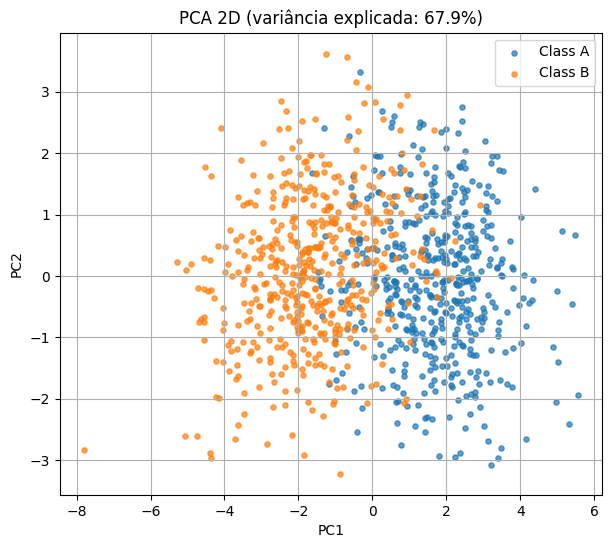

In [17]:
# Plotar
plt.figure(figsize=(7,6))
plt.scatter(Z[y==0,0], Z[y==0,1], s=14, alpha=0.7, label="Class A")
plt.scatter(Z[y==1,0], Z[y==1,1], s=14, alpha=0.7, label="Class B")
plt.xlabel("PC1")
plt.ylabel("PC2")

var_exp = 100 * vals[:2].sum() / vals.sum()
plt.title(f"PCA 2D (variância explicada: {var_exp:.1f}%)")
plt.legend()
plt.grid(True)
plt.show()


### Analyze the Plots:
a. Based on your 2D projection, describe the relationship between the two classes.

b. Discuss the linear separability of the data. Explain why this type of data structure poses a challenge for simple linear models and would likely require a multi-layer neural network with non-linear activation functions to be classified accurately.


## Exercise 3

### Preparing Real-World Data for a Neural Network
This exercise uses a real dataset from Kaggle. Your task is to perform the necessary preprocessing to make it suitable for a neural network that uses the hyperbolic tangent (tanh) activation function in its hidden layers.

### DATASET: Spaceship Titanic

Dataset Description (Spaceship Titanic)
Objetivo

O dataset tem como objetivo prever se um passageiro foi transportado para outra dimensão durante a colisão da Spaceship Titanic com a anomalia do espaço-tempo.

A coluna Transported é a variável-alvo (target), representando:

True → passageiro foi transportado.

False → passageiro não foi transportado.



Variáveis (features)

    Identificação

PassengerId: Identificador único de cada passageiro. Não é uma feature preditiva em si, mas pode ser usado para agrupar famílias.

    Categóricas (valores discretos / não numéricos)

HomePlanet: Planeta de origem.

CryoSleep: Indica se o passageiro estava em sono criogênico (True/False).

Cabin: Número da cabine (pode ser decomposta em deck, num e side).

Destination: Planeta de destino.

VIP: Passageiro contratou serviço VIP (True/False).

Name: Nome do passageiro (pouco útil como feature, pode ser descartado ou usado apenas para engenharia de features).

    Numéricas (valores contínuos / quantitativos)

Age: Idade.

RoomService: Valor gasto em serviço de quarto.

FoodCourt: Valor gasto no restaurante.

ShoppingMall: Valor gasto no shopping.

Spa: Valor gasto no spa.

VRDeck: Valor gasto no deck de realidade virtual.

Target (variável resposta)

Transported: Passageiro foi transportado (True ou False).



In [18]:
import pandas as pd

# Carregar dataset
df = pd.read_csv("spaceship-titanic/train.csv")

# Contar valores ausentes por coluna
missing = df.isnull().sum()
print(missing)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


Valores ausentes

No Kaggle, sabemos que o dataset tem missing values em várias colunas.
Por exemplo:

Age → alguns passageiros não têm idade registrada.

Cabin → muitos registros estão vazios.

HomePlanet → há valores ausentes.

CryoSleep e VIP → também têm valores faltantes.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck → vários passageiros têm valores nulos (pode ser gasto zero ou dado faltante).



### 3.1 Preprocessing
a) Handling Missing Data

Numéricas (Age, gastos) → substituir pela mediana (mais robusta a outliers).

Categóricas (HomePlanet, Destination) → substituir pelo valor mais frequente (mode).

Binárias (CryoSleep, VIP) → preencher com False ou pelo mode.

Cabin → separar em Deck e Side; valores ausentes tratados como categoria "Unknown".



In [19]:
import warnings

# Fill numeric with median
for col in ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical with mode
for col in ["HomePlanet","Destination"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Binary categorical
for col in ["CryoSleep","VIP"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Cabin -> split
df["Deck"] = df["Cabin"].str[0]
df["Side"] = df["Cabin"].str[-1]
df.drop(columns=["Cabin","Name","PassengerId"], inplace=True)
df["Deck"].fillna("Unknown", inplace=True)
df["Side"].fillna("Unknown", inplace=True)
warnings.filterwarnings("ignore")

### 3.2 Normalize / Standardize Numerical Features

Como vamos usar tanh, é melhor que os dados estejam centrados em 0 e dentro de uma escala comparável.

Opção 1: Padronização (Z-score) → média = 0, desvio = 1.

Opção 2: Normalização [-1, 1].

Aqui vou usar Z-score:



In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
df[num_cols] = scaler.fit_transform(df[num_cols])


In [11]:
import numpy as np

num_cols = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean) / std

### 3.3 Visualização (antes e depois)

Exemplo para Age e FoodCourt:



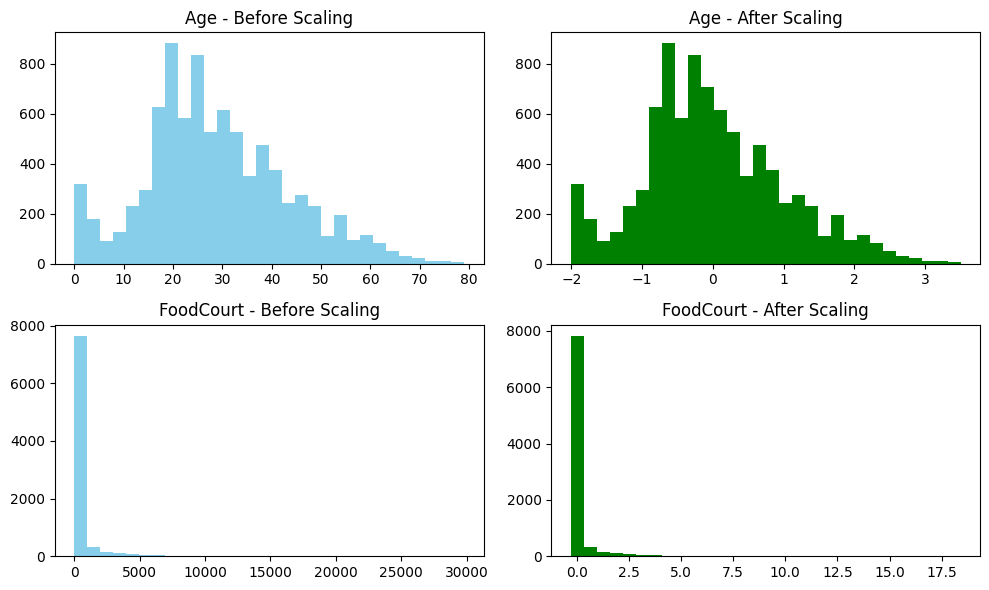

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10,6))

# Age antes
df_raw = pd.read_csv("spaceship-titanic/train.csv")
axes[0,0].hist(df_raw["Age"].dropna(), bins=30, color="skyblue")
axes[0,0].set_title("Age - Before Scaling")

# Age depois
axes[0,1].hist(df["Age"], bins=30, color="green")
axes[0,1].set_title("Age - After Scaling")

# FoodCourt antes
axes[1,0].hist(df_raw["FoodCourt"].dropna(), bins=30, color="skyblue")
axes[1,0].set_title("FoodCourt - Before Scaling")

# FoodCourt depois
axes[1,1].hist(df["FoodCourt"], bins=30, color="green")
axes[1,1].set_title("FoodCourt - After Scaling")

plt.tight_layout()
plt.show()